In [31]:
from PIL.ExifTags import TAGS
import pathlib
import csv
import glob
from PIL import Image
import pandas as pd
import os
from datetime import time
from matplotlib import markers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib
import seaborn as sns
import glob
from seaborn import palettes
from seaborn.categorical import swarmplot
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import json
from scipy.signal import detrend
from scipy.ndimage import gaussian_filter1d
from skimage.color import rgb2gray
import os
import re
import math
import matplotlib.ticker as tck
import argparse
import cv2
import skimage as ski

Loading csv file with grouped by measurement_id and well_id

In [37]:
path = 'C:/Users/srboval1/OneDrive - Aalto University/Instru/Datafiles/Exp2'
Exp2 = pd.read_csv(path +'/contours_exp2.csv', index_col=None)
print(Exp2.columns)

Index(['Unnamed: 0', 'ID_running', 'time_id', 'incubation_time',
       'area_pixels**2', 'area_µm', 'normalize_area_µm', 'perimeter_µm',
       'compactness', 'aspect_ratio', 'convex hull perimeter',
       'convex hull area', 'convexity_perimeter', 'convexity_area', 'well_id',
       'measurement_id', 'cell_line', 'matrix', 'date', 'grouped_id'],
      dtype='object')


Unique materials and cell lines

In [33]:
unique_materials = Exp2['matrix'].unique()
print(unique_materials)

unique_lines = Exp2['cell_line'].unique()
print(unique_lines)


['IPN22mM' 'IPN3mM' 'collagen']
['MCF10A' 'DCIS.COM' 'MCF10AT']


C:\Users\srboval1\AppData\Local\Temp\ipykernel_19880\1197871859.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  specific_df_grp = specific_df.groupby(['cell_line','incubation_time']).mean()
C:\Users\srboval1\AppData\Local\Temp\ipykernel_19880\1197871859.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  specific_df_grp = specific_df.groupby(['cell_line','incubation_time']).mean()
C:\Users\srboval1\AppData\Local\Temp\ipykernel_19880\1197871859.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either spe

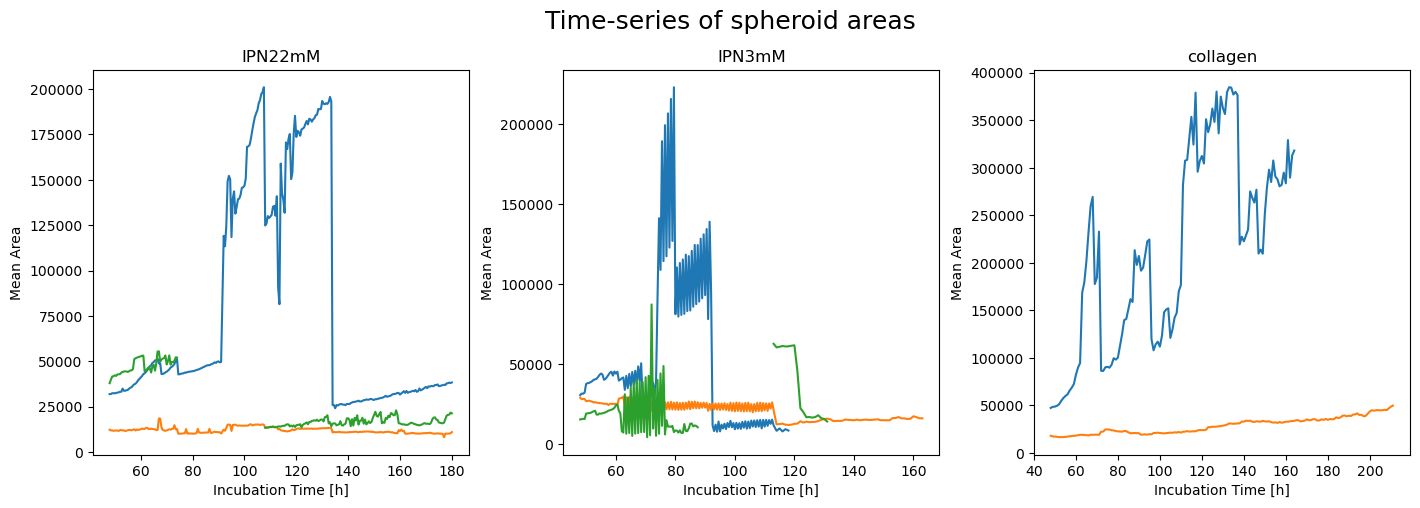

In [34]:
fig, axs = plt.subplots(1, len(unique_materials), figsize=(17,5))
plt.subplots_adjust(wspace=0.25, hspace=0.25)
fig.suptitle("Time-series of spheroid areas", fontsize=18, y=1)

for i,unique_material in enumerate(unique_materials):
    specific_df = Exp2[Exp2['matrix'] == unique_material]
    specific_df_grp = specific_df.groupby(['cell_line','incubation_time']).mean()
    #print(specific_df_grp.head())
    ax=axs[i]
    ax.plot(specific_df_grp.unstack(0)['area_µm']) # area as a function of incubation time, for each cell line
    ax.set_xlabel('Incubation Time [h]')  
    ax.set_ylabel('Mean Area')        
    ax.set_title(unique_material)




c:\Users\srboval1\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\srboval1\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\srboval1\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\srboval1\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\srboval1\AppData\Local\anac

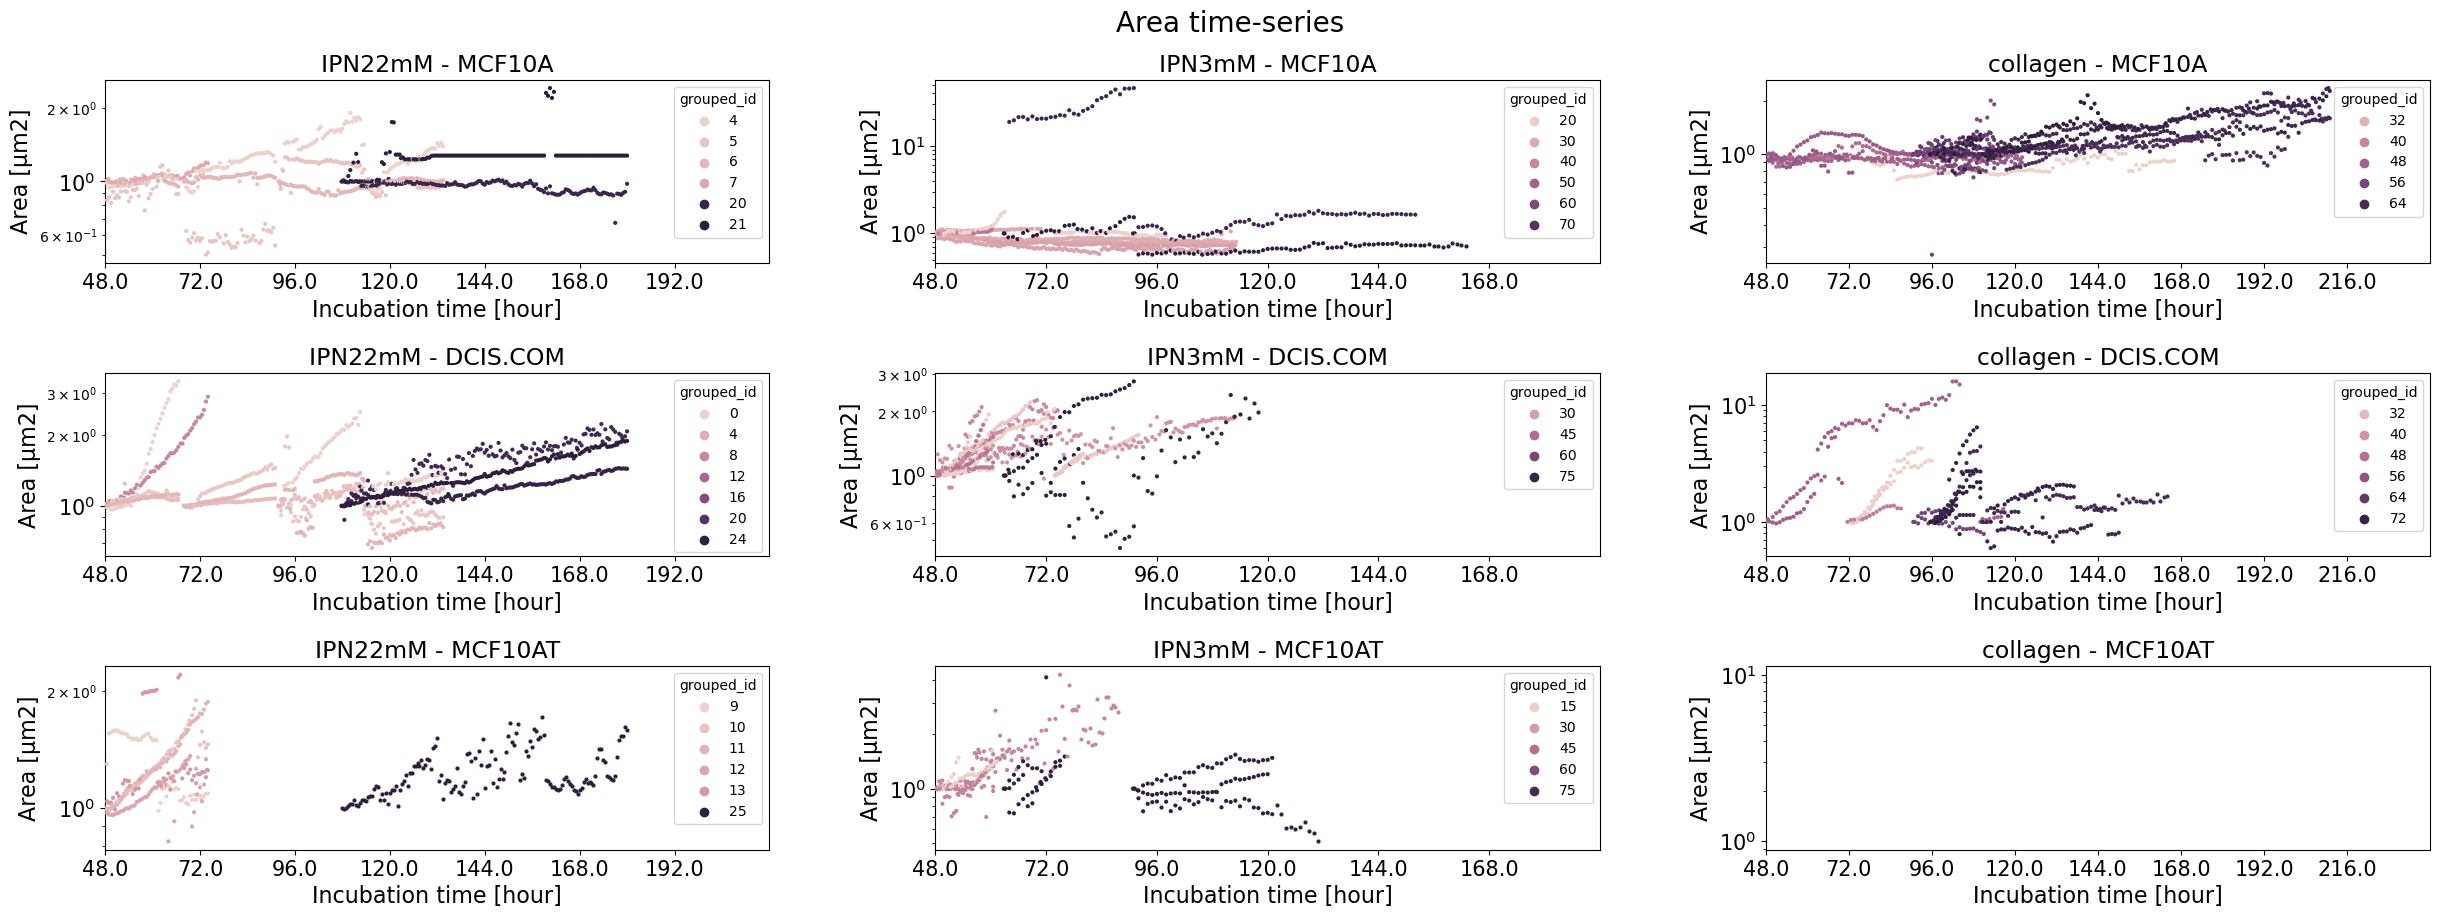

In [39]:
fig, axs = plt.subplots(3, len(unique_materials), figsize=(30,10))
plt.subplots_adjust(wspace=0.25, hspace=0.6)
fig.suptitle("Area time-series", fontsize=20, y=0.95)


for i, unique_material in enumerate(unique_materials):
    specific_df = Exp2[(Exp2['matrix'] == unique_material) & (Exp2['area_µm'] > 0) ]

    min_value_all = (specific_df['incubation_time'].min() // 24) * 24 #latest end of timelpases x_max
    max_value_all = (specific_df['incubation_time'].max() // 24 + 2) * 24 #latest end of timelpases x_max

    times = list(np.arange(min_value_all, max_value_all, 24)) #ticks' values

    
    for j,unique_line in enumerate(unique_lines):
        ax=axs[j,i]
        specific_specific_df = specific_df[(specific_df['cell_line'] == unique_line)]

        #min_value = specific_specific_df['incubation_time'].min() #latest end of timelpases x_max
        #max_value = specific_specific_df['incubation_time'].max() #latest end of timelpases x_max

        #print( f'{unique_material}- {unique_line}; min: {min_value} and max {max_value}')

        sns.swarmplot(specific_specific_df, y='normalize_area_µm', ax=ax, x='incubation_time', native_scale=True, hue='grouped_id', size =3, marker='o')
        ax.set_xlim(min_value_all, max_value_all)  

        ax.set_yscale('log')

        ax.set_ylabel('Area [µm2]', fontsize= 16)  
        ax.set_xlabel('Incubation time [hour]', fontsize= 16)  

        ax.set_title(f'{unique_material} - {unique_line}', fontsize= 17)
        #ax.set_ylim(10**3,10**6)
        ax.set_xticks(times)
        ax.set_xticklabels(times)
        ax.tick_params(axis='both', which='major', labelsize=15)  # Major ticks

    
plt.savefig(path +'/Time_series.png',dpi=1000)

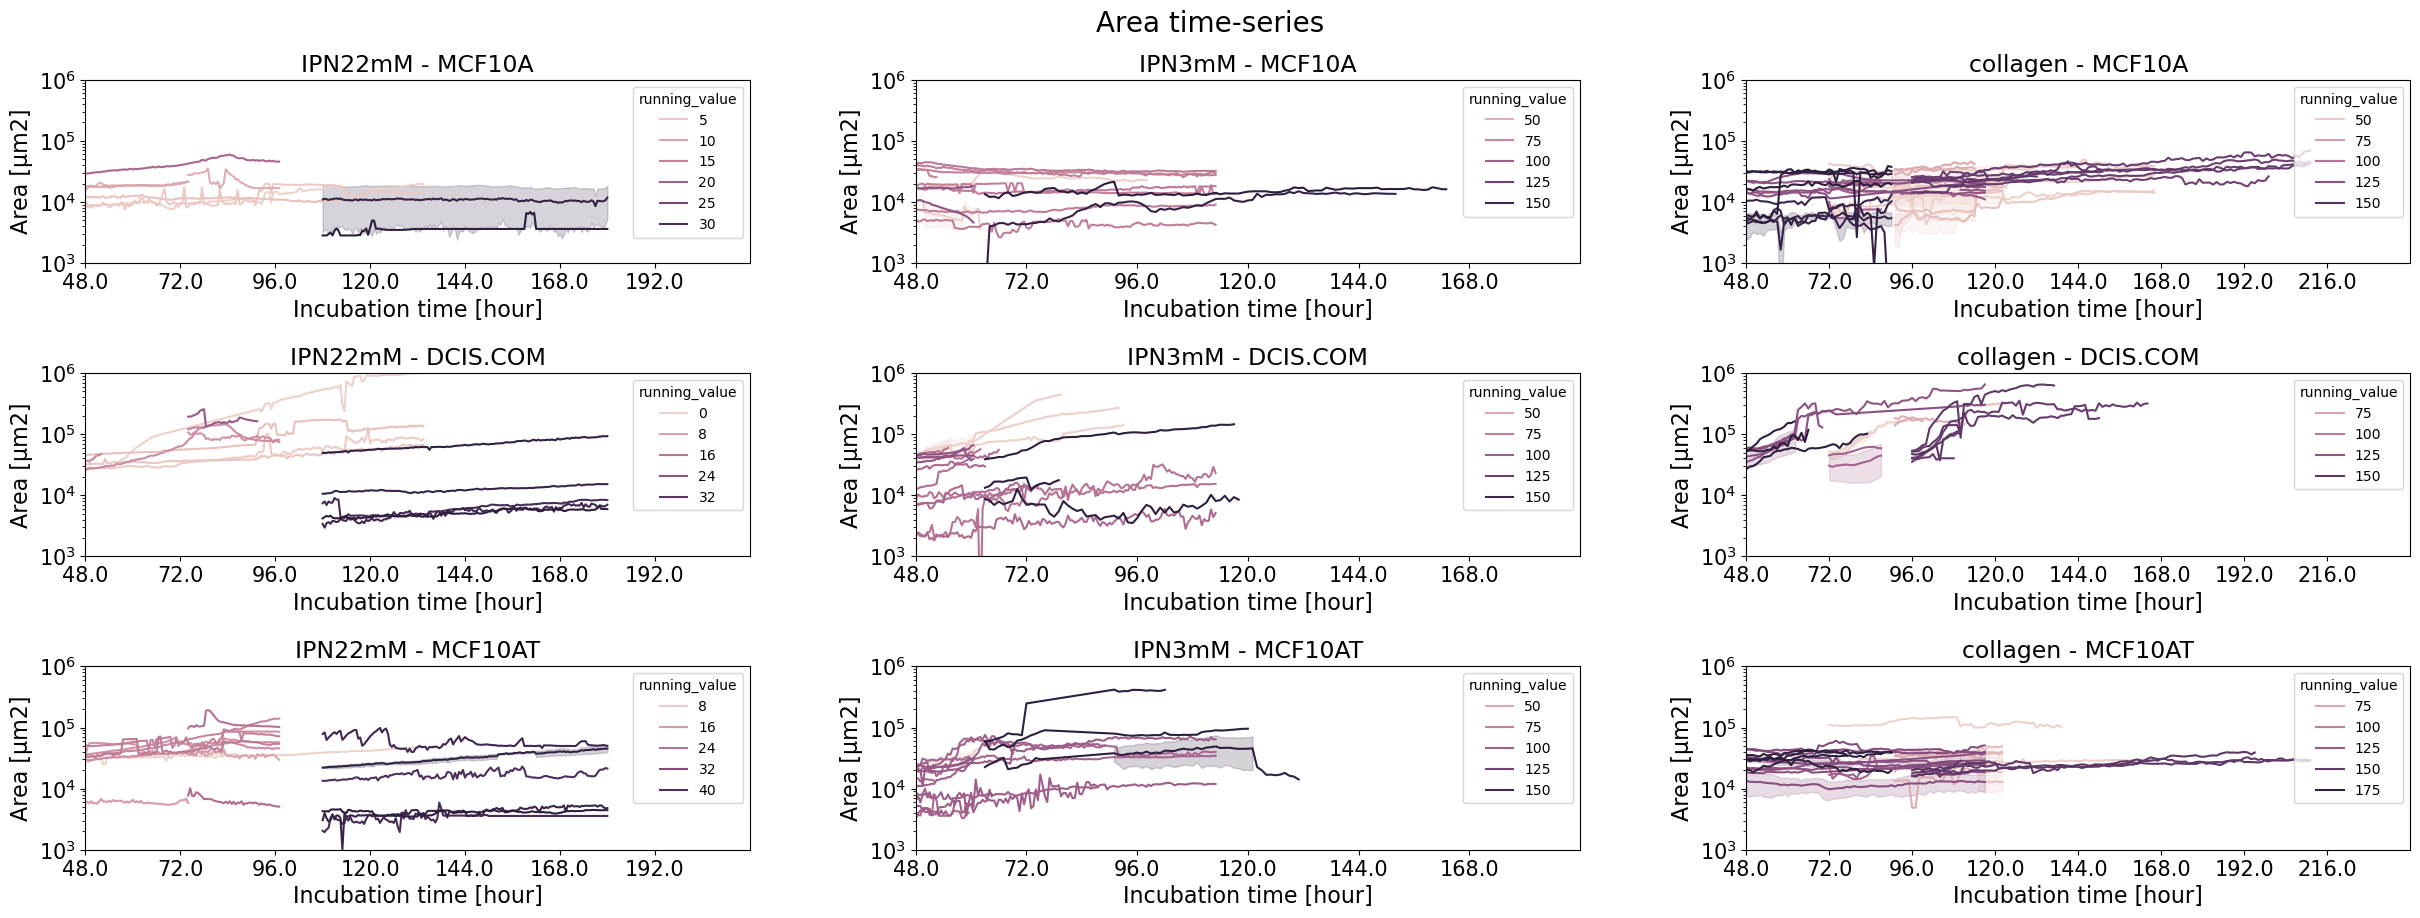

In [24]:
fig, axs = plt.subplots(3, len(unique_materials), figsize=(30,10))
plt.subplots_adjust(wspace=0.25, hspace=0.6)
fig.suptitle("Area time-series", fontsize=20, y=0.95)


for i, unique_material in enumerate(unique_materials):
    specific_df = Exp2[(Exp2['matrix'] == unique_material) & (Exp2['area_µm'] > 0) ]

    min_value_all = (specific_df['incubation_time'].min() // 24) * 24 #latest end of timelpases x_max
    max_value_all = (specific_df['incubation_time'].max() // 24 + 2) * 24 #latest end of timelpases x_max

    times = list(np.arange(min_value_all, max_value_all, 24)) #ticks' values

    
    for j,unique_line in enumerate(unique_lines):
        ax=axs[j,i]
        specific_specific_df = specific_df[(specific_df['cell_line'] == unique_line)]

        #min_value = specific_specific_df['incubation_time'].min() #latest end of timelpases x_max
        #max_value = specific_specific_df['incubation_time'].max() #latest end of timelpases x_max

        #print( f'{unique_material}- {unique_line}; min: {min_value} and max {max_value}')

        sns.lineplot(specific_specific_df, y='area_µm', ax=ax, x='incubation_time', hue='running_value')
        ax.set_xlim(min_value_all, max_value_all)  

        ax.set_yscale('log')

        ax.set_ylabel('Area [µm2]', fontsize= 16)  
        ax.set_xlabel('Incubation time [hour]', fontsize= 16)  

        ax.set_title(f'{unique_material} - {unique_line}', fontsize= 17)
        ax.set_ylim(10**3,10**6)
        ax.set_xticks(times)
        ax.set_xticklabels(times)
        ax.tick_params(axis='both', which='major', labelsize=15)  # Major ticks

    
plt.savefig(path +'/Time_series.png',dpi=1000)

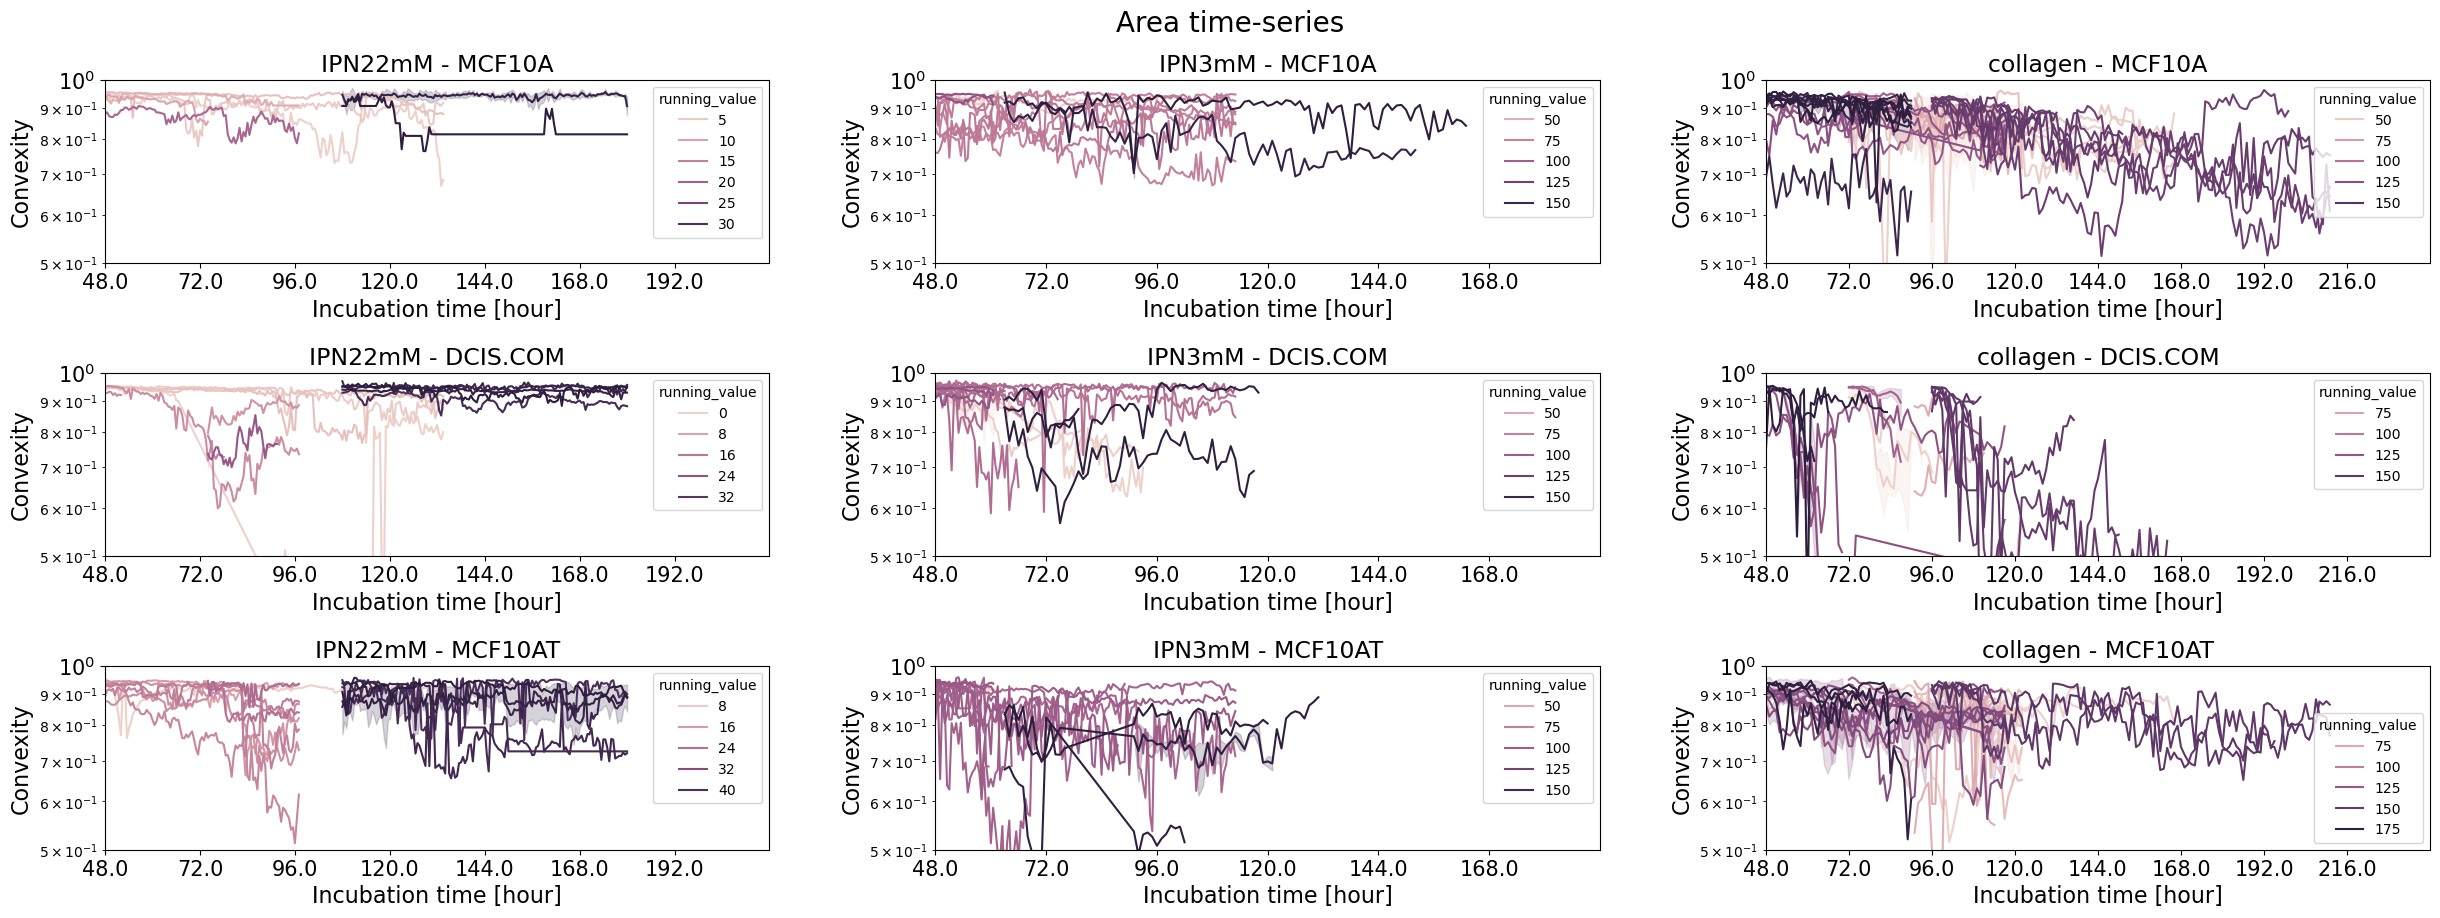

In [30]:
fig, axs = plt.subplots(3, len(unique_materials), figsize=(30,10))
plt.subplots_adjust(wspace=0.25, hspace=0.6)
fig.suptitle("Area time-series", fontsize=20, y=0.95)


for i, unique_material in enumerate(unique_materials):
    specific_df = Exp2[(Exp2['matrix'] == unique_material) & (Exp2['area_µm'] > 0) ]

    min_value_all = (specific_df['incubation_time'].min() // 24) * 24 #latest end of timelpases x_max
    max_value_all = (specific_df['incubation_time'].max() // 24 + 2) * 24 #latest end of timelpases x_max

    times = list(np.arange(min_value_all, max_value_all, 24)) #ticks' values

    
    for j,unique_line in enumerate(unique_lines):
        ax=axs[j,i]
        specific_specific_df = specific_df[(specific_df['cell_line'] == unique_line)]

        #min_value = specific_specific_df['incubation_time'].min() #latest end of timelpases x_max
        #max_value = specific_specific_df['incubation_time'].max() #latest end of timelpases x_max

        #print( f'{unique_material}- {unique_line}; min: {min_value} and max {max_value}')

        sns.lineplot(specific_specific_df, y='convexity_perimeter', ax=ax, x='incubation_time', hue='running_value')
        ax.set_xlim(min_value_all, max_value_all)  

        ax.set_yscale('log')

        ax.set_ylabel('Convexity', fontsize= 16)  
        ax.set_xlabel('Incubation time [hour]', fontsize= 16)  

        ax.set_title(f'{unique_material} - {unique_line}', fontsize= 17)
        ax.set_ylim(0.5,1)
        ax.set_xticks(times)
        ax.set_xticklabels(times)
        ax.tick_params(axis='both', which='major', labelsize=15)  # Major ticks

    
plt.savefig(path +'/Time_series.png',dpi=1000)